In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.15.0'

In [3]:
#import some basic libraries 

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 


In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#splitting the dataset into independant  AND dependant feature 

X=dataset.iloc[:,3:13]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
y=dataset.iloc[:,13]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
#Feature engineering 

geography = pd.get_dummies(X['Geography'],drop_first=True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [9]:
gender = pd.get_dummies(X['Gender'],drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [10]:
#concatenate these variable with dataframe 

In [11]:
X= X.drop(['Geography','Gender'],axis=1)

In [12]:
X=pd.concat([X,geography,gender],axis=1)

In [13]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


Splitting the dataset into training and test set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.20,random_state=0)

Feature scaling 

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [18]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [19]:
X_train.shape

(8000, 11)

In [20]:
X_test.shape

(2000, 11)

### Part 2 

Lets create ANN 

1.Tensorflow ---> Gooogle deepmind 

2.Pytorch ---> facebook 

Keras --> wrapper 

After 2.0 keras and tensorflow got integrated 



In [21]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

- **Sequential Model:** This part allows you to create a neural network model by sequentially stacking layers. It simplifies the process of building a model by adding layers one after the other in a linear fashion, making it easier to define and train complex architectures.

- **Dense Layer:** The Dense layer is a standard fully connected layer in a neural network. It connects every neuron in one layer to every neuron in the next layer, allowing for complex learning patterns to be captured in the data. This layer is fundamental in most neural network architectures.

- **Activation Functions:** Activation functions like LeakyReLU, PReLU, ELU, and ReLU are used to introduce non-linearity into the neural network. They help the model learn complex patterns by adding flexibility and allowing the network to model more intricate relationships within the data.

- **Dropout Layer:** The Dropout layer is a regularization technique used during training to prevent overfitting. It randomly sets a fraction of input units to zero at each update during training, which helps prevent the model from relying too heavily on specific features or correlations in the training data, thus improving its generalization performance.

Lets iniatialize the ANN


In [22]:
classifier = Sequential()

Adding the input layer 

In [23]:
classifier.add(Dense(units=11,activation='ReLU'))


Adding the first hidden layer 

In [24]:
classifier.add(Dense(units=7,activation='ReLU'))
classifier.add(Dropout(0.2))

Adding the second hidden layer 

In [25]:
classifier.add(Dense(units=6,activation='ReLU'))
classifier.add(Dropout(0.2))

Adding the output layer 

In [26]:
classifier.add(Dense(1,activation='sigmoid'))

In [27]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

by default adam will add a learning rate of 0.01

Or , 

if  you want to add the learning rate separately ;

In [28]:
#import tensorflow
#opt= tensorflow.keras.optimizers.Adam(learning_rate=0.01)

#classifier.compile(optimizer='opt',loss='binary_crossentropy',metrics=['accuracy'])

Now we have to train the model 

In [29]:
#model_history =classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs =1000)

* You have a training dataset of size 8000 samples (X_train.shape = (8000, 11)).
* You're using a batch size of 10 (batch_size=10).
* Therefore, the total number of batches per epoch would be 8000 / 10 = 800.
* However, since you're also using a validation split of 33% (validation_split=0.33), a portion of the training data is reserved for validation. So, the actual number of batches used for training would be slightly less than 800.
* The number "536" you see in the output indicates that in that particular epoch, 536 batches were processed.

1- 0.33 (validation)

0.67*8000 data points /10 batch size = 536

1. Number of Epochs (epochs): The number of epochs determines how many times the model will go through the entire dataset during training. In this case, setting epochs to 1000 means that the model will iterate over the training data 1000 times to learn from it. Using a higher number of epochs allows the model to potentially learn more complex patterns but may also increase the risk of overfitting if not monitored carefully.


2. Batch Size: The batch size specifies the number of data points used in each iteration during training. A batch size of 10 means that the model will update its weights after processing every 10 data points. Smaller batch sizes can lead to more frequent weight updates and potentially faster convergence, while larger batch sizes may provide computational efficiency but could result in slower convergence.


3. Validation Split: The validation split parameter determines how much of the training data is used for validation during training. In this case, a validation split of 0.33 means that 33% of the training data (after shuffling) is set aside for validation while training the model. This validation set helps monitor the model's performance on unseen data and can be crucial for detecting overfitting or assessing generalization capabilities.

What should be the number of epochs?

## Early stopping?

* It makes sure that , whenever the accuaracy is not much increasing  then automatically the training will stop. 


* ie., Stop training when a monitored metric has stopped improving  and can idebtify on which epoch it basically stopped 


* Early stopping is a regularization technique used in machine learning to prevent overfitting. It monitors the performance of the model on a held-out validation set during training and terminates the training if the validation performance stops improving. This is done to prevent the model from overfitting to the training data and improve its generalization capabilities.

In [30]:
import tensorflow as tf 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=20,verbose=1,mode="auto",baseline=None,restore_best_weights=False)

In [31]:
model_history =classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs =1000,callbacks=early_stopping)

Epoch 1/1000


536/536 [==============================] - 4s 3ms/step - loss: 0.5369 - accuracy: 0.7779 - val_loss: 0.4603 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4645 - accuracy: 0.7959 - val_loss: 0.4433 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4500 - accuracy: 0.7960 - val_loss: 0.4340 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4436 - accuracy: 0.7962 - val_loss: 0.4245 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4337 - accuracy: 0.8011 - val_loss: 0.4141 - val_accuracy: 0.7993
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4223 - accuracy: 0.8184 - val_loss: 0.4038 - val_accuracy: 0.8277
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4068 - accuracy: 0.8278 - val_loss: 0.3923 - val_accurac

Early stopped at epoch 50

In [43]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Now we are going to plot the summary for the hostory for accuaracy

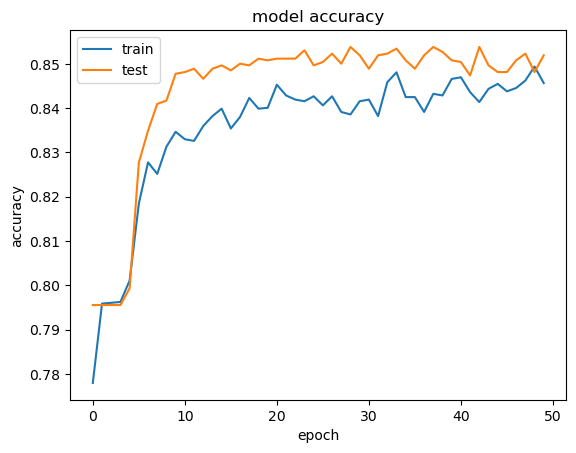

In [44]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

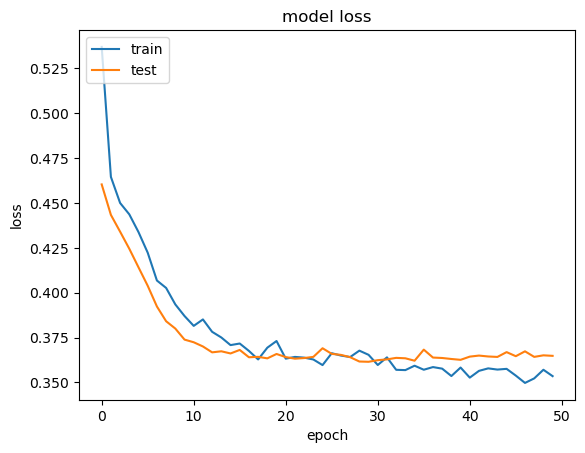

In [45]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1528,   67],
       [ 212,  193]], dtype=int64)

In [48]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [49]:
score

0.8605

In [50]:
classifier.get_weights()

[array([[ 0.05976485, -0.15080763, -0.0295204 ,  0.27002022, -0.01130662,
         -0.02488791,  0.41467598, -0.04441308,  0.02171771,  0.06119448,
          0.25805467],
        [-0.4338596 , -0.505495  ,  0.6697196 , -0.24934438, -0.6648082 ,
          0.02309177,  0.10681108,  0.12705275,  0.20367353, -1.1841787 ,
          0.54026663],
        [ 0.3095923 , -0.1353536 ,  0.26661575, -0.06494106,  0.09742041,
          0.06695012, -0.05072728,  0.13360739, -0.03162249, -0.06481994,
         -0.2351408 ],
        [-0.70453066, -0.05907622, -0.02957264, -0.19160637,  0.02912955,
         -0.71166474, -0.32690072,  0.15973443,  0.09232717, -0.10147776,
          0.28654274],
        [-0.05305754, -0.02474291, -0.10370017, -0.24736688, -0.05909951,
         -0.9013869 ,  0.34041774,  1.0970262 , -1.2424587 , -0.11700853,
          0.5927887 ],
        [-0.40323266, -0.3952927 ,  0.05667464,  0.81432194,  0.03830466,
          0.01043865, -0.1706213 , -0.16775157, -0.15426038, -0.3934911

In [40]:
import pickle

In [41]:
model_weights =  classifier.get_weights()

In [42]:
# Save the weights as a pickle file
with open('model1_weights.pkl', 'wb') as f:
    pickle.dump(model_weights, f)